In [13]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\User\Downloads\movies.csv')



# Now let's take a look at the data

df.head()




,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [11]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))



name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%
correctY - 1%


In [5]:
#use released column to just fetch Year
df['correctY']=df['released'].astype('str').str.split(',').str[1]
df['correctY']= df['correctY'].str.split('(').str[0]
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctY
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [4]:

df.sort_values(by=['gross'],inplace=False,ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89
1601,My Twentieth Century,0,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104


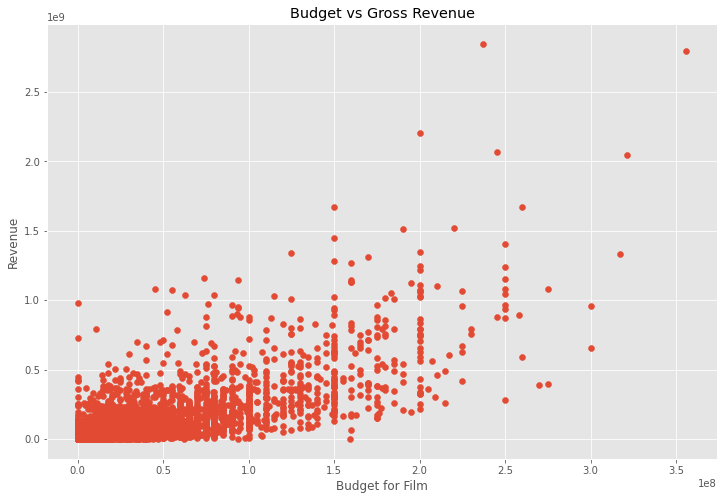

In [30]:
#budget vs gross revenue (scatter plot)
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Revenue')
plt.xlabel('Budget for Film')
plt.ylabel('Revenue')
plt.show()
#df.head()




<AxesSubplot:xlabel='budget', ylabel='gross'>

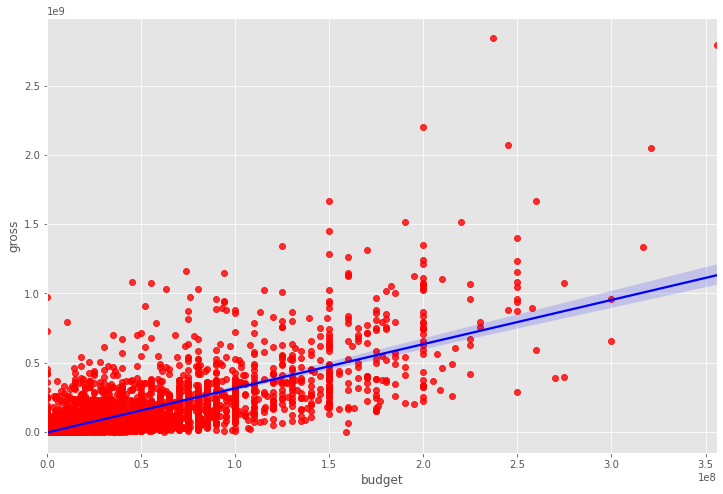

In [21]:
# Plot Budget vs Gross using seaborn
sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"red"},line_kws={"color":"blue"})

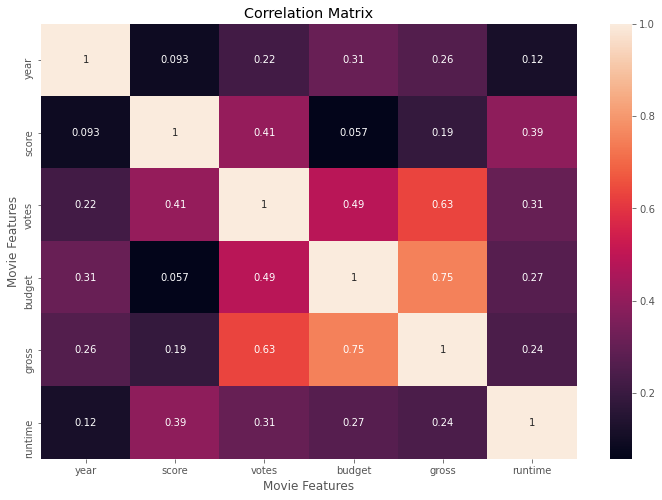

In [29]:
#Correlation finding 
df.corr()#pearson is default
#df.corr(method='kendall'),can also use spearman
#High Correlation bw Budget and Gross
co_mat=df.corr()
sns.heatmap(co_mat, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [34]:
#lets include company name in the Matrix
df_numcomp= df
for col_name in df_numcomp.columns:
    if(df_numcomp[col_name].dtype == 'object'):
       df_numcomp[col_name]= df_numcomp[col_name].astype('category')
       df_numcomp[col_name]= df_numcomp[col_name].cat.codes
        

In [37]:
df_numcomp.dtypes
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,7,6,1980,1706,8.4,927000,2589,4015,1048,55,19000000,46998772,2320,146
1,5573,7,1,1980,1493,5.8,65000,2269,1633,328,56,4500000,58853106,732,104
2,5142,5,0,1980,1772,8.7,1200000,1111,2568,1746,56,18000000,538375067,1541,124
3,286,5,4,1980,1493,7.7,221000,1301,2001,2247,56,3500000,83453539,1813,88
4,1027,7,4,1980,1544,7.3,108000,1054,522,411,56,6000000,39846344,1778,98


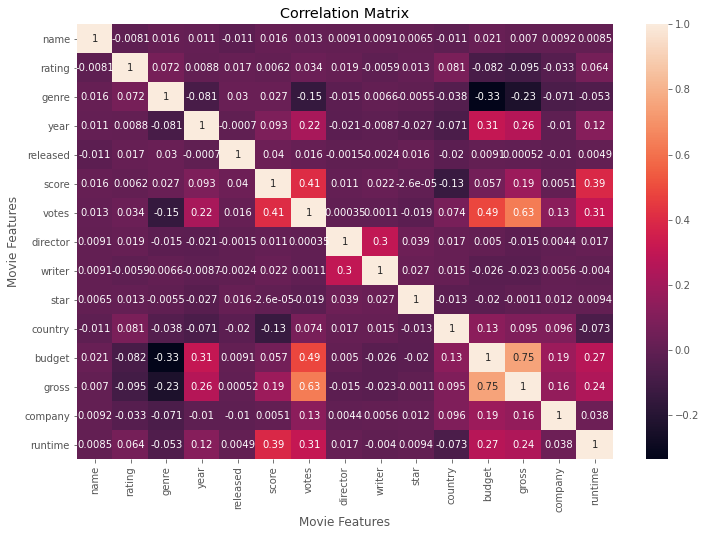

In [39]:
df.corr()
co_mat=df.corr()
sns.heatmap(co_mat, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [42]:
cor2=df_numcomp.corr()
cor_mat2=cor2.unstack()
sort_cor=cor_mat2.sort_values()
sort_cor
high_cor=sort_cor[(sort_cor)>0.5]
high_cor

votes     gross       0.632870
gross     votes       0.632870
          budget      0.750157
budget    gross       0.750157
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64